In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [30]:
df = pd.read_csv('Dataset.csv')
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,filename,link,ratings,review
0,15970.jpg,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg,http://assets.myntassets.com/v1/images/style/p...,4,"High quality fabric, very satisfied. for every..."
1,39386.jpg,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg,http://assets.myntassets.com/v1/images/style/p...,4,"Exceeded expectations, love the fit! and I'm v..."
2,59263.jpg,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg,http://assets.myntassets.com/v1/images/style/p...,4,"Perfect for any occasion, great buy. Would rec..."
3,21379.jpg,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg,http://assets.myntassets.com/v1/images/style/p...,4,"High quality fabric, very satisfied. for casua..."
4,53759.jpg,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg,http://assets.myntassets.com/v1/images/style/p...,2,"Poor material, doesn't last long. for special ..."


In [31]:
df['id'] = df['id'].str.split('.').str[0]

In [32]:
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,filename,link,ratings,review
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg,http://assets.myntassets.com/v1/images/style/p...,4,"High quality fabric, very satisfied. for every..."
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg,http://assets.myntassets.com/v1/images/style/p...,4,"Exceeded expectations, love the fit! and I'm v..."
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg,http://assets.myntassets.com/v1/images/style/p...,4,"Perfect for any occasion, great buy. Would rec..."
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg,http://assets.myntassets.com/v1/images/style/p...,4,"High quality fabric, very satisfied. for casua..."
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg,http://assets.myntassets.com/v1/images/style/p...,2,"Poor material, doesn't last long. for special ..."


<h3>handling missing values</h3>

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44424 entries, 0 to 44423
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44424 non-null  object 
 1   gender              44424 non-null  object 
 2   masterCategory      44424 non-null  object 
 3   subCategory         44424 non-null  object 
 4   articleType         44424 non-null  object 
 5   baseColour          44409 non-null  object 
 6   season              44403 non-null  object 
 7   year                44423 non-null  float64
 8   usage               44107 non-null  object 
 9   productDisplayName  44417 non-null  object 
 10  filename            44424 non-null  object 
 11  link                44424 non-null  object 
 12  ratings             44424 non-null  int64  
 13  review              44424 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 4.7+ MB


In [34]:
df.id = df.id.astype('int64')

In [35]:
df.isnull().sum()

id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
filename                0
link                    0
ratings                 0
review                  0
dtype: int64

In [36]:
df.usage.value_counts()

usage
Casual          34406
Sports           4025
Ethnic           3208
Formal           2345
Smart Casual       67
Party              29
Travel             26
Home                1
Name: count, dtype: int64

In [37]:
df.dropna(inplace=True)

In [38]:
df.isnull().sum()

id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
filename              0
link                  0
ratings               0
review                0
dtype: int64

In [39]:
df.describe()

,id,year,ratings
count,44077.000000,44077.000000,44077.00000
mean,29550.577444,2012.782041,3.60383
std,16974.233378,2.108119,1.27851
min,1163.000000,2007.000000,1.00000
25%,14722.000000,2011.000000,3.00000
50%,28491.000000,2012.000000,4.00000
75%,44407.000000,2015.000000,5.00000
max,60000.000000,2019.000000,5.00000


In [40]:
catnames = [ 'gender', 'masterCategory', 'subCategory', 'articleType',
       'baseColour', 'season','usage','Month']
numnames = ['id','year','ratings','Price (USD)']

<h3>categorical data analysis</h3>

In [41]:
for i in catnames:
    print(f'{i}: {df[i].unique()}')

gender: ['Men' 'Women' 'Boys' 'Girls' 'Unisex']
masterCategory: ['Apparel' 'Accessories' 'Footwear' 'Personal Care' 'Free Items'
 'Sporting Goods' 'Home']
subCategory: ['Topwear' 'Bottomwear' 'Watches' 'Socks' 'Shoes' 'Belts' 'Flip Flops'
 'Bags' 'Innerwear' 'Sandal' 'Shoe Accessories' 'Fragrance' 'Jewellery'
 'Lips' 'Saree' 'Eyewear' 'Scarves' 'Dress' 'Loungewear and Nightwear'
 'Wallets' 'Apparel Set' 'Headwear' 'Mufflers' 'Skin Care' 'Makeup'
 'Free Gifts' 'Ties' 'Accessories' 'Nails' 'Beauty Accessories'
 'Water Bottle' 'Skin' 'Eyes' 'Bath and Body' 'Gloves'
 'Sports Accessories' 'Cufflinks' 'Sports Equipment' 'Stoles' 'Hair'
 'Perfumes' 'Home Furnishing' 'Umbrellas' 'Wristbands' 'Vouchers']
articleType: ['Shirts' 'Jeans' 'Watches' 'Track Pants' 'Tshirts' 'Socks' 'Casual Shoes'
 'Belts' 'Flip Flops' 'Handbags' 'Tops' 'Bra' 'Sandals' 'Shoe Accessories'
 'Sweatshirts' 'Deodorant' 'Formal Shoes' 'Bracelet' 'Lipstick' 'Flats'
 'Kurtas' 'Waistcoat' 'Sports Shoes' 'Shorts' 'Briefs' 'Sare

KeyError: 'Month'

In [ ]:
# Filter out rows using boolean indexing
df = df[~df['masterCategory'].isin(["Personal Care", "Home", "Free Items"])]
df = df[~df['subCategory'].isin(["Perfumes", "Water Bottle"])]

In [ ]:
for i in catnames:
    print(f'{i}: {df[i].unique()}')

gender: ['Men' 'Women' 'Boys' 'Girls' 'Unisex']
masterCategory: ['Apparel' 'Accessories' 'Footwear' 'Sporting Goods']
subCategory: ['Topwear' 'Bottomwear' 'Watches' 'Socks' 'Shoes' 'Belts' 'Flip Flops'
 'Bags' 'Innerwear' 'Sandal' 'Shoe Accessories' 'Jewellery' 'Saree'
 'Eyewear' 'Scarves' 'Dress' 'Loungewear and Nightwear' 'Wallets'
 'Apparel Set' 'Headwear' 'Mufflers' 'Ties' 'Accessories' 'Gloves'
 'Sports Accessories' 'Cufflinks' 'Sports Equipment' 'Stoles' 'Umbrellas'
 'Wristbands']
articleType: ['Shirts' 'Jeans' 'Watches' 'Track Pants' 'Tshirts' 'Socks' 'Casual Shoes'
 'Belts' 'Flip Flops' 'Handbags' 'Tops' 'Bra' 'Sandals' 'Shoe Accessories'
 'Sweatshirts' 'Formal Shoes' 'Bracelet' 'Flats' 'Kurtas' 'Waistcoat'
 'Sports Shoes' 'Shorts' 'Briefs' 'Sarees' 'Heels' 'Sunglasses'
 'Innerwear Vests' 'Pendant' 'Laptop Bag' 'Scarves' 'Dresses'
 'Night suits' 'Skirts' 'Wallets' 'Blazers' 'Ring' 'Kurta Sets' 'Clutches'
 'Shrug' 'Backpacks' 'Caps' 'Trousers' 'Earrings' 'Camisoles' 'Boxers'
 'J

In [ ]:
df.shape

(41824, 16)

<h3>outlier detection</h3>

In [ ]:
dict_unique = {
    "numerical_columns": numnames,
    "unique_values": [df[i].nunique() for i in numnames]
}

In [ ]:
df_unique = pd.DataFrame(dict_unique)
df_unique

,numerical_columns,unique_values
0,id,41824
1,year,12
2,ratings,5
3,Price (USD),140


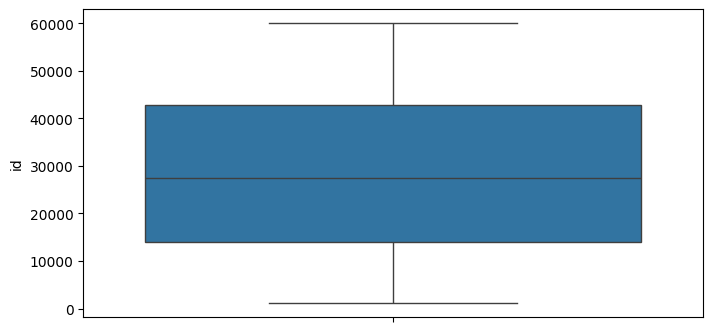

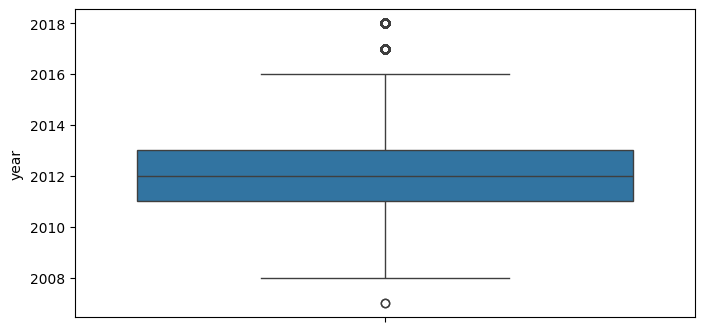

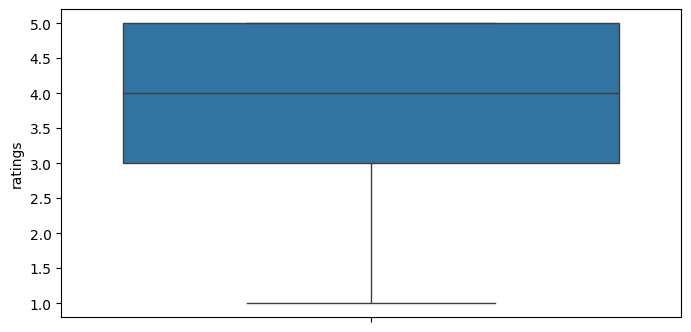

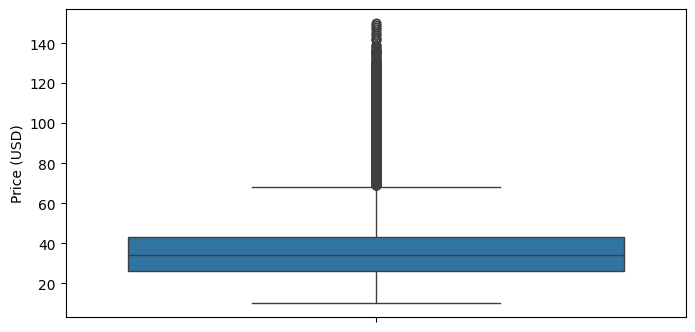

In [ ]:
for i in numnames:
    plt.figure(figsize=(8,4))
    sns.boxplot(df[i])

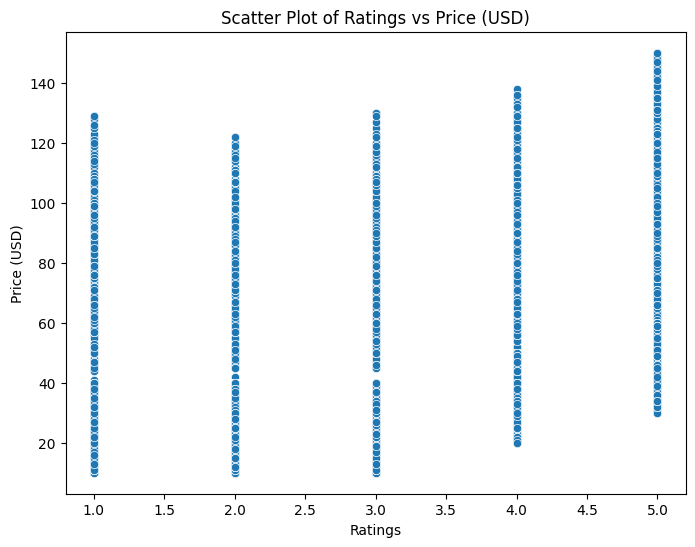

In [ ]:
# Scatter plot for Ratings vs Price (USD)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='ratings', y='Price (USD)')
plt.title('Scatter Plot of Ratings vs Price (USD)')
plt.xlabel('Ratings')
plt.ylabel('Price (USD)')
plt.show()


In [ ]:
q25,q75 = np.percentile(df["Price (USD)"],[25,75])

In [ ]:
iqr = q75 - q25
iqr

17.0

In [ ]:
q0 = q25 - 1.5*iqr
q100 = q75 + 1.4*iqr
q0,q100

(0.5, 66.8)

In [ ]:
df = df[(df['Price (USD)'] >= q0) & (df['Price (USD)'] <= q100)]

In [ ]:
df

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,filename,link,ratings,review,Month,Price (USD)
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg,http://assets.myntassets.com/v1/images/style/p...,4,"High quality fabric, very satisfied. for every...",February,37
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg,http://assets.myntassets.com/v1/images/style/p...,4,"Perfect for any occasion, great buy. Would rec...",September,32
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg,http://assets.myntassets.com/v1/images/style/p...,4,"High quality fabric, very satisfied. for casua...",May,41
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg,http://assets.myntassets.com/v1/images/style/p...,2,"Poor material, doesn't last long. for special ...",January,11
5,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011.0,Casual,Inkfruit Mens Chain Reaction T-shirt,1855.jpg,http://assets.myntassets.com/v1/images/style/p...,4,"Comfortable and stylish, worth the price. for ...",December,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44418,42234,Women,Apparel,Topwear,Tops,Blue,Summer,2012.0,Casual,Sepia Women Blue Printed Top,42234.jpg,http://assets.myntassets.com/v1/images/style/p...,4,"Perfect for any occasion, great buy. for every...",December,33
44419,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe,17036.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"Perfect for any occasion, great buy..",January,49
44420,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop,6461.jpg,http://assets.myntassets.com/v1/images/style/p...,1,"Cheap fabric, uncomfortable to wear. Would not...",November,27
44421,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt,18842.jpg,http://assets.myntassets.com/v1/images/style/p...,3,"Good for casual wear, but not exceptional. Wou...",March,19


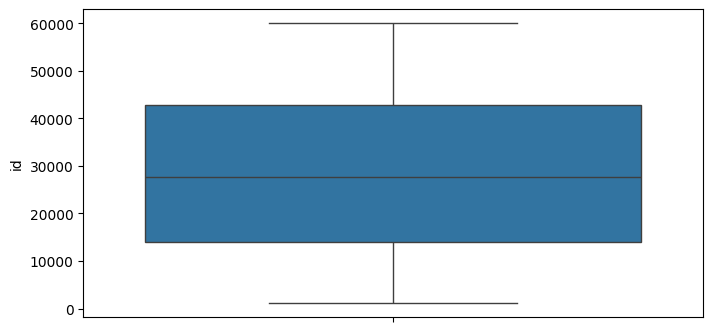

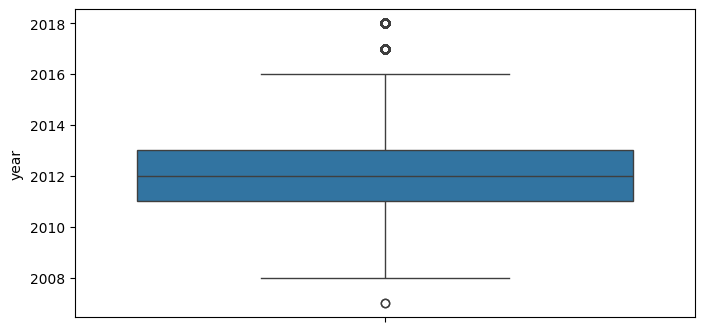

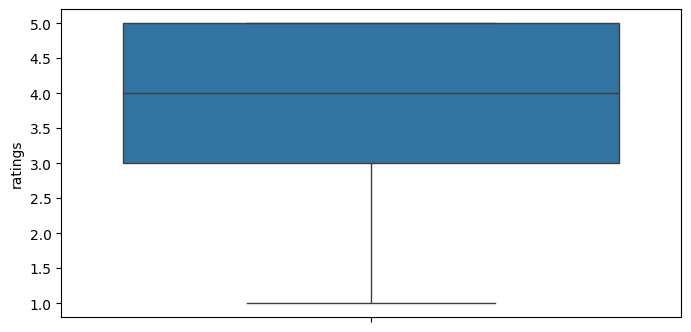

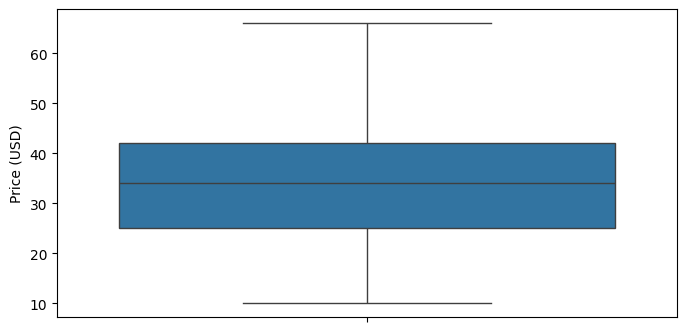

In [ ]:
for i in numnames:
    plt.figure(figsize=(8,4))
    sns.boxplot(df[i])

<h3>distribution analysis</h3>

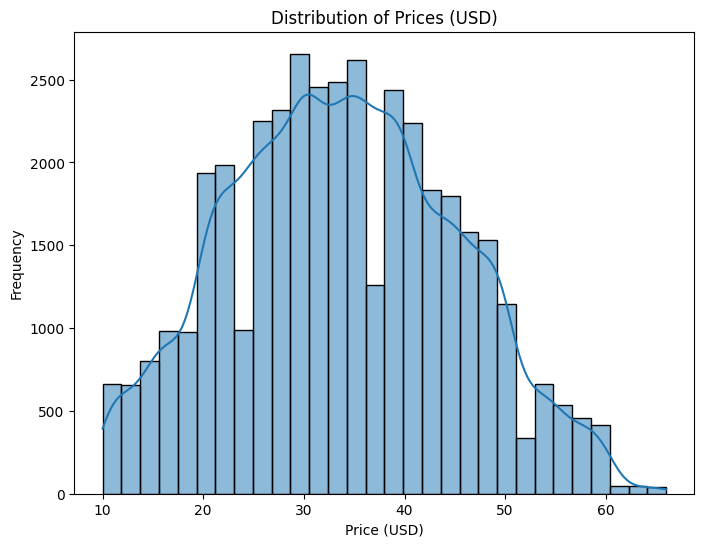

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Price (USD)'], bins=30, kde=True)
plt.title('Distribution of Prices (USD)')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

id:  0.16636672217191156
year:  1.0601832721701734
ratings:  -0.6542760730815498
Price (USD):  0.11214868217173354


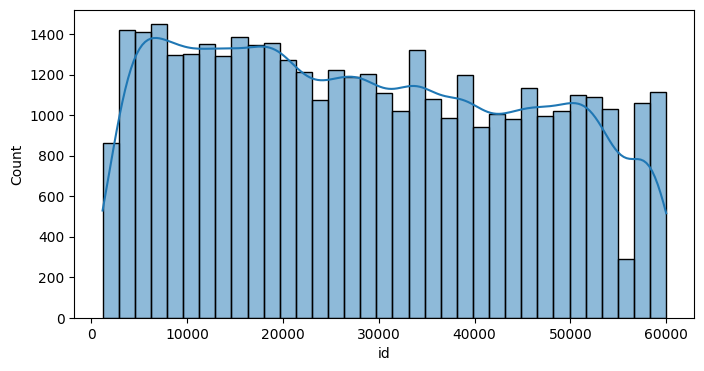

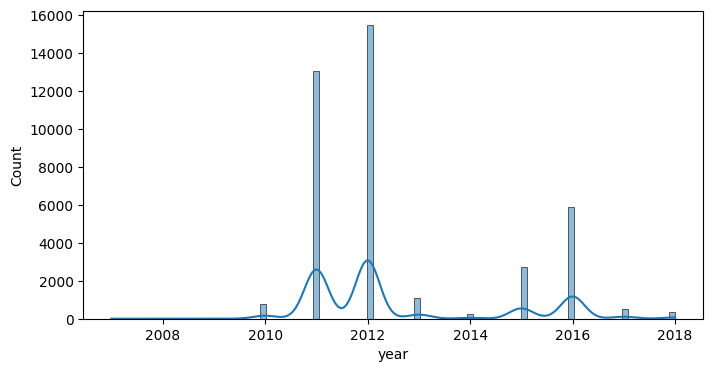

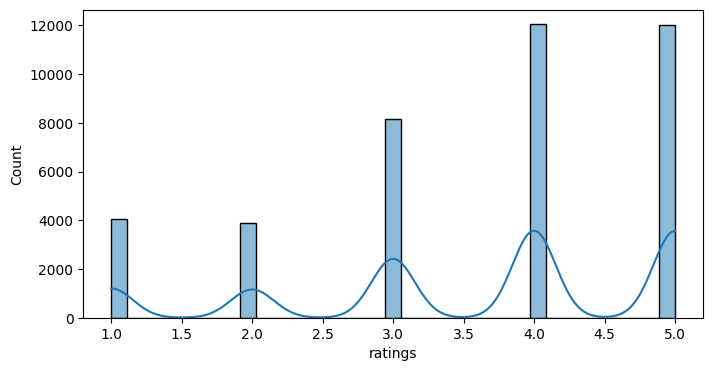

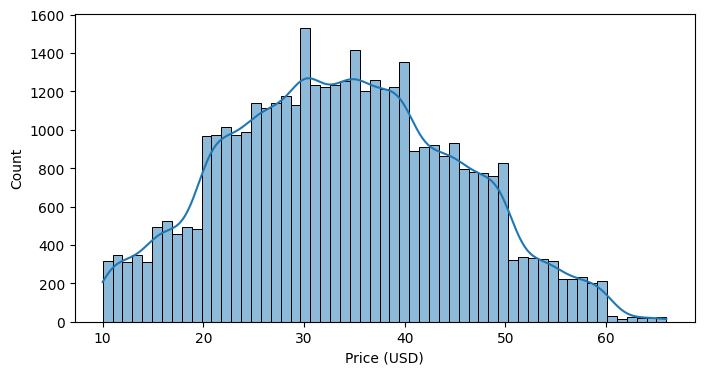

In [ ]:
# plotting histograms to check the distribution of numerical data
from scipy.stats import skew
for i in numnames:
    plt.figure(figsize=(8,4))
    print(f"{i}: ",df[i].skew())
    sns.histplot(df[i],kde=True)

<h3>Random oversampling for year column</h3>

In [ ]:
from sklearn.utils import resample

# Separate the data into a list of dataframes by year
dfs = [df[df['year'] == year] for year in df['year'].unique()]

# Determine the target number of samples for each year (e.g., the average count)
target_samples = int(np.mean([len(sub_df) for sub_df in dfs]))

# Resample each year group to the target size
dfs_resampled = [resample(sub_df, replace=True, n_samples=target_samples, random_state=42) for sub_df in dfs]

# Combine all resampled groups into a single dataframe
df_balanced = pd.concat(dfs_resampled)

In [ ]:
df_balanced.year.value_counts()

,count
year,
2011.0,3343
2016.0,3343
2012.0,3343
2015.0,3343
2014.0,3343
2010.0,3343
2013.0,3343
2017.0,3343
2018.0,3343


In [ ]:
df_balanced.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,filename,link,ratings,review,Month,Price (USD)
24779,11986,Men,Footwear,Shoes,Casual Shoes,White,Fall,2011.0,Casual,Fila Men Trasform White Casual Shoes,11986.jpg,http://assets.myntassets.com/v1/images/style/p...,5,Amazing quality! Definitely recommend. for cas...,July,40
2888,3709,Men,Apparel,Topwear,Tshirts,Purple,Summer,2011.0,Casual,Classic Polo Men's Purple Black Stripe T-shirt,3709.jpg,http://assets.myntassets.com/v1/images/style/p...,4,"Exceeded expectations, love the fit!.",June,33
18370,24628,Men,Footwear,Shoes,Formal Shoes,Black,Fall,2011.0,Formal,Arrow Men Black Formal Shoes,24628.jpg,http://assets.myntassets.com/v1/images/style/p...,1,"Very disappointed, won't buy again..",June,32
17633,11557,Women,Apparel,Topwear,Kurtas,White,Summer,2011.0,Ethnic,W Women Printed White Kurtas,11557.jpg,http://assets.myntassets.com/v1/images/style/p...,3,"It's okay, nothing special..",June,32
40632,22740,Women,Apparel,Topwear,Kurtas,Blue,Fall,2011.0,Ethnic,BIBA Women Printed Blue Kurta,22740.jpg,http://assets.myntassets.com/v1/images/style/p...,1,"Poor material, doesn't last long. Would recomm...",August,15


<Axes: xlabel='year', ylabel='Count'>

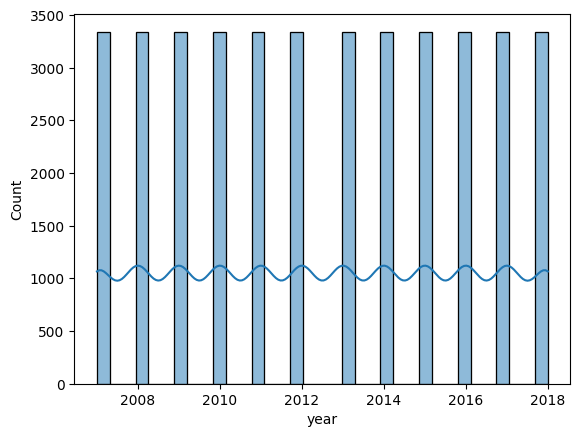

In [ ]:
sns.histplot(df_balanced["year"],kde=True)

<h3>categorical analysis</h3>

Frequency Distribution of categorical columns


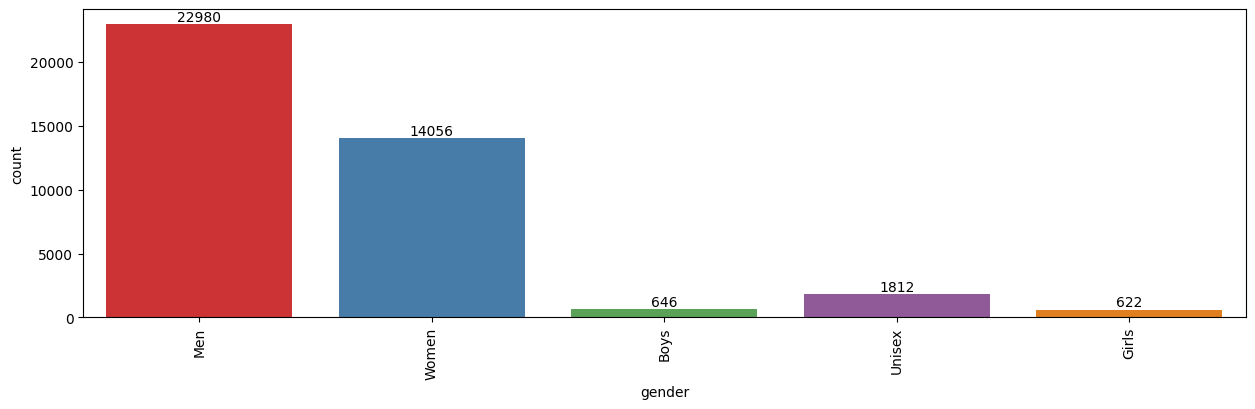

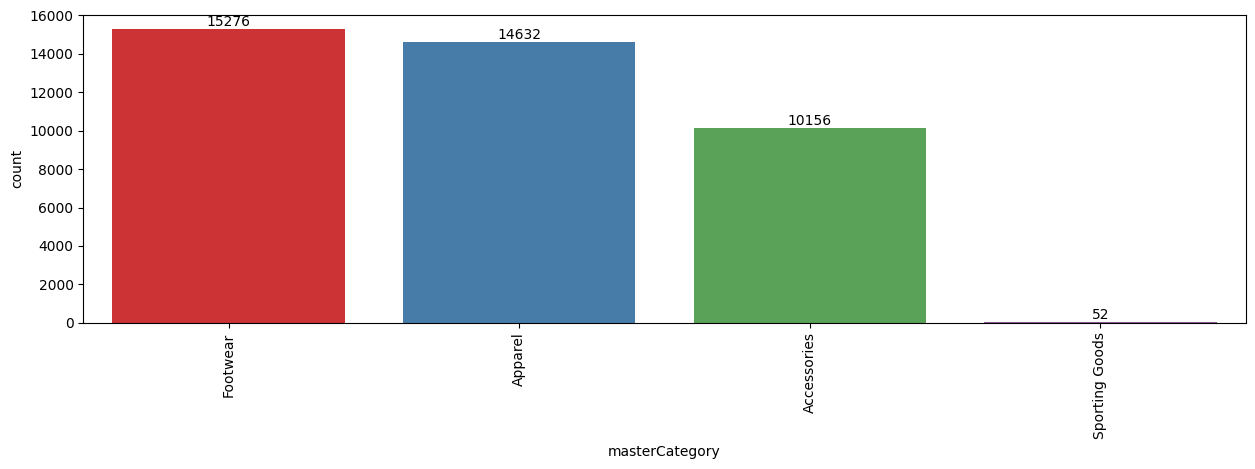

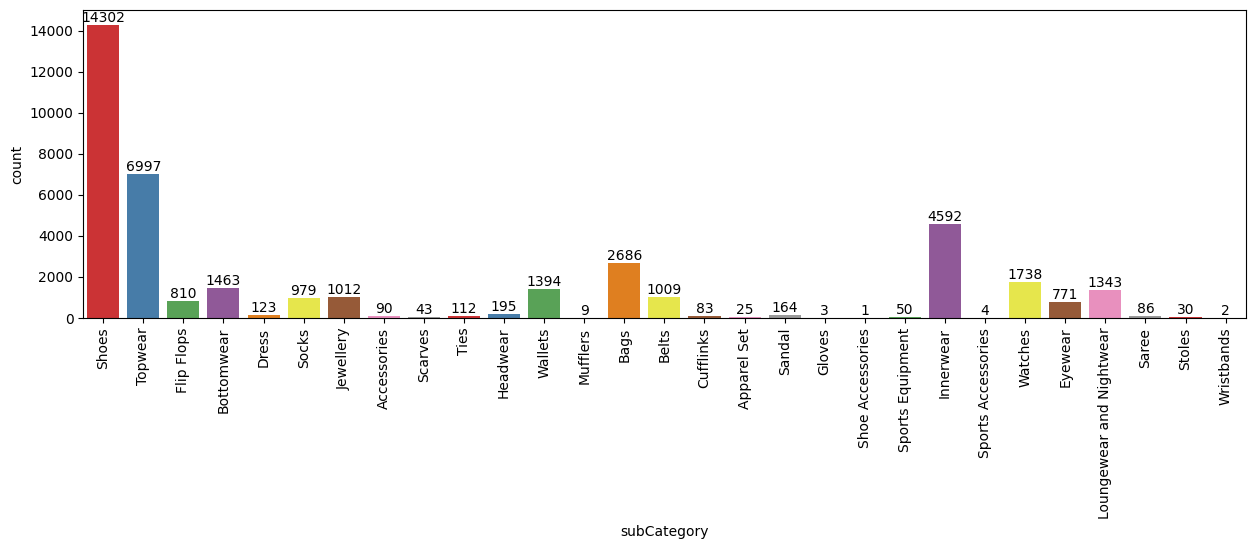

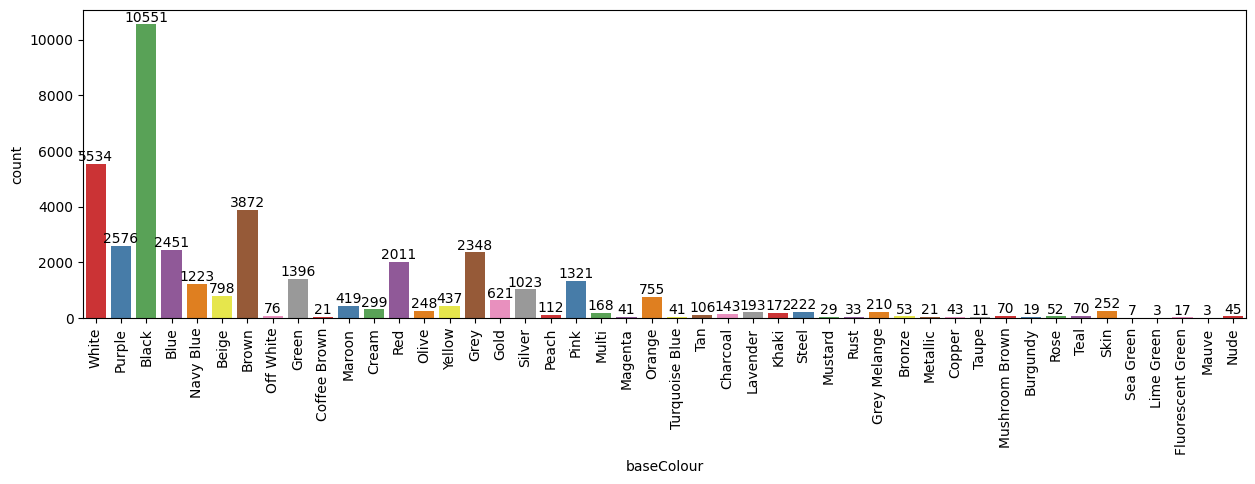

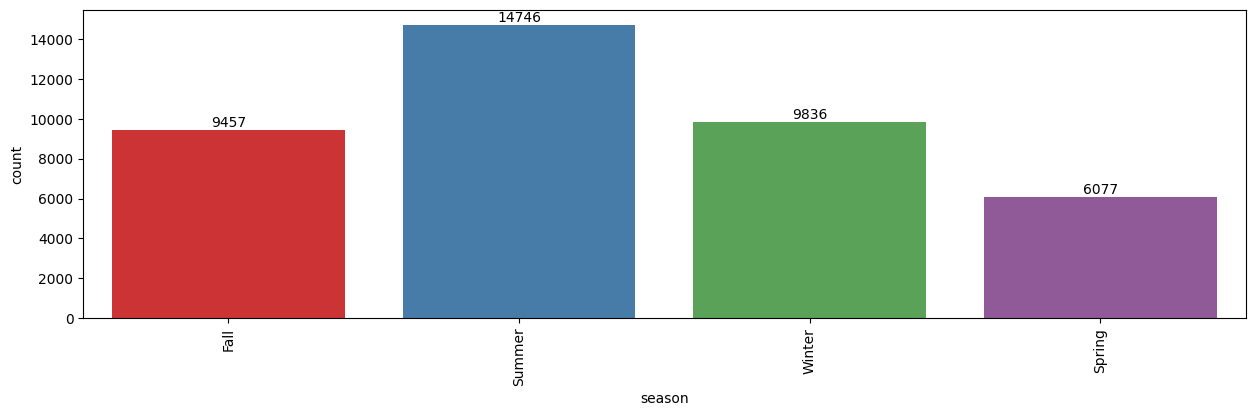

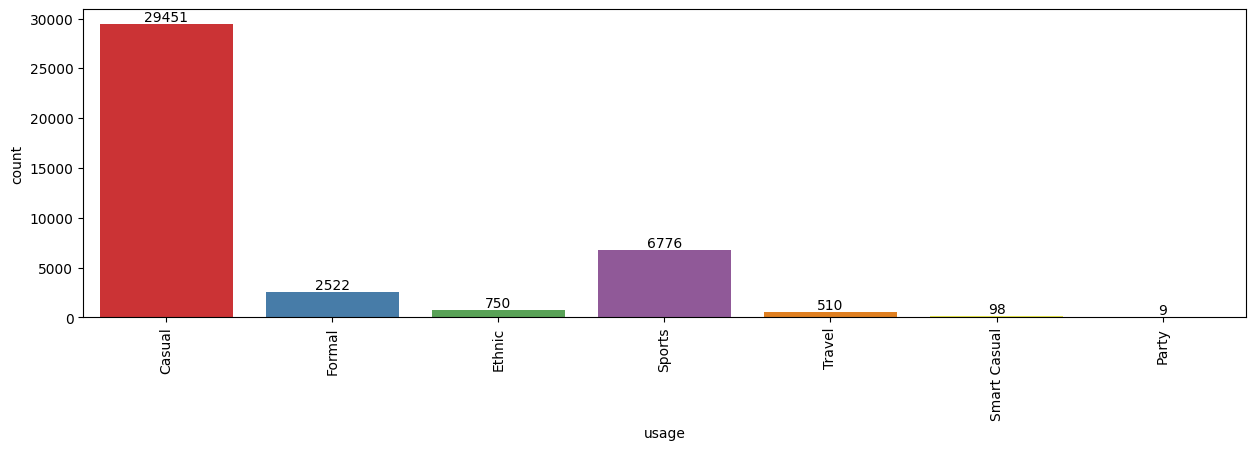

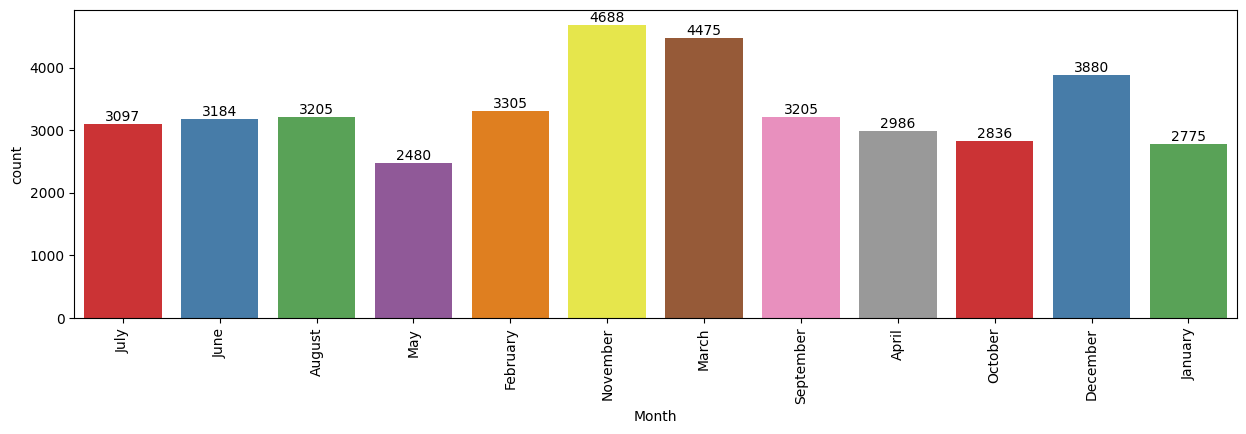

In [ ]:
# understanding the distribution and frequency of categorical columns(demographics)
print('Frequency Distribution of categorical columns')
for i in catnames:
    if i == "articleType":
        continue
    plt.figure(figsize=(15, 4))
    ax = sns.countplot(data=df_balanced, x=i, palette='Set1')
    plt.xticks(rotation=90)
    for j in ax.containers:
        ax.bar_label(j)

<h3>bivariate analysis</h3>

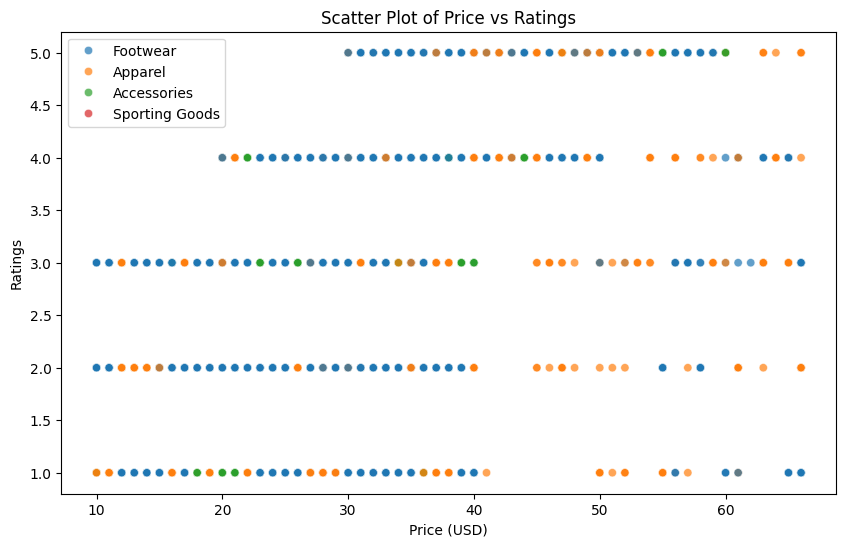

In [ ]:
# Scatter plot of Price vs Ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_balanced, x='Price (USD)', y='ratings', hue='masterCategory', alpha=0.7)
plt.title('Scatter Plot of Price vs Ratings')
plt.xlabel('Price (USD)')
plt.ylabel('Ratings')
plt.legend(loc='upper left')
plt.show()

Text(0.5, 1.0, 'Box Plot of Master category by Price(USD)')

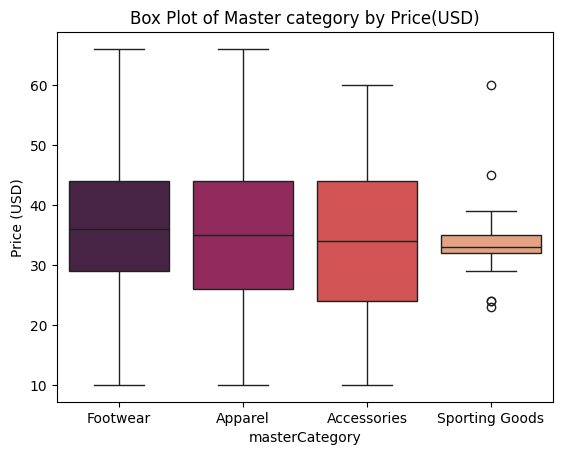

In [ ]:
sns.boxplot(df_balanced,x='masterCategory',y='Price (USD)',palette='rocket')
plt.title("Box Plot of Master category by Price(USD)")

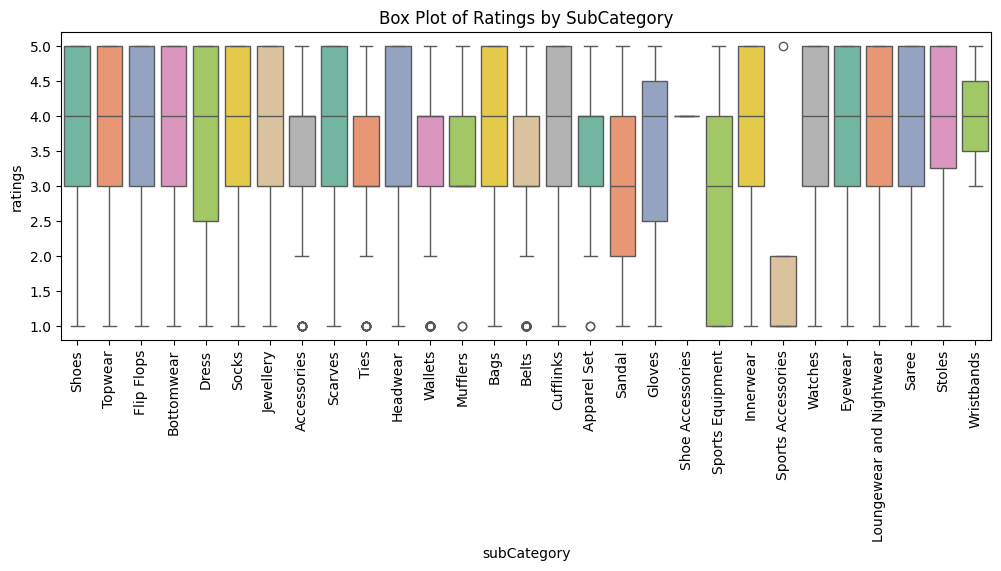

In [ ]:
plt.figure(figsize=(12,4))
sns.boxplot(df_balanced,x='subCategory',y='ratings',palette='Set2')
plt.title("Box Plot of Ratings by SubCategory")
plt.xticks(rotation=90)
plt.show()

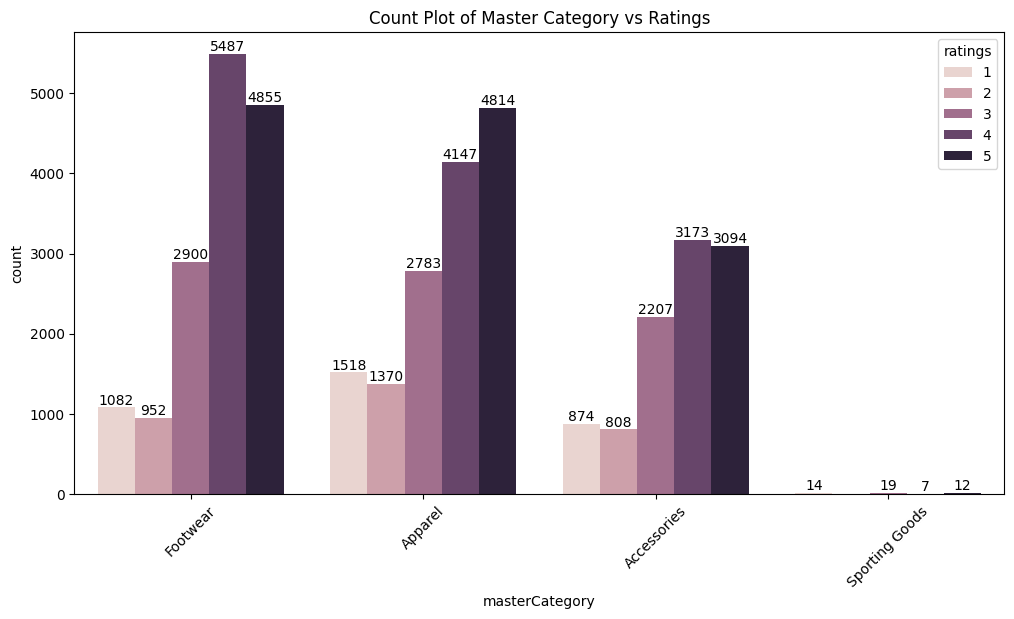

In [ ]:
# Count plot of Master Category vs Ratings
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df_balanced, x='masterCategory', hue='ratings')
for i in ax.containers:
    plt.bar_label(i)
plt.title('Count Plot of Master Category vs Ratings')
plt.xticks(rotation=45)
plt.show()

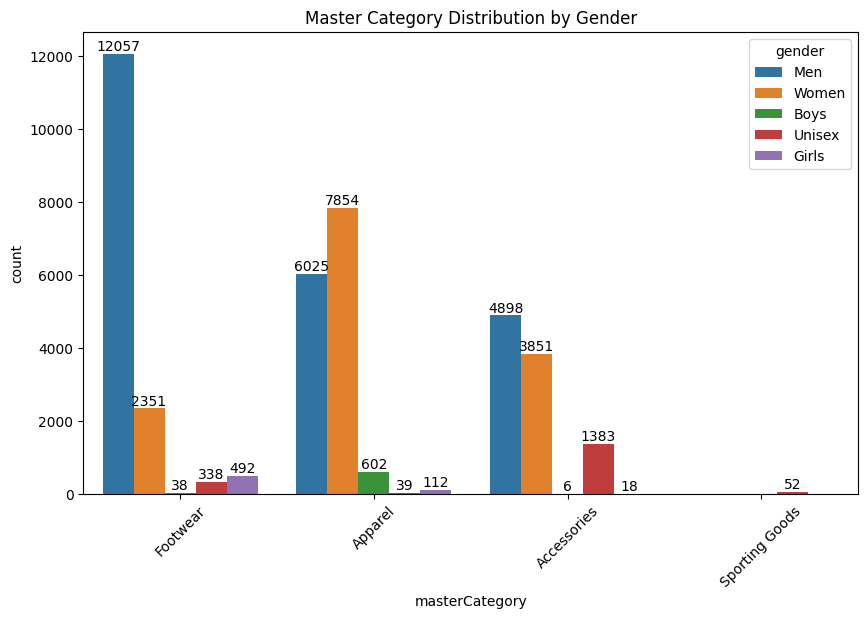

In [ ]:
# Master Category vs Gender
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_balanced, x='masterCategory', hue='gender')
for i in ax.containers:
    plt.bar_label(i)
plt.title('Master Category Distribution by Gender')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df_balanced.subCategory.unique()

array(['Shoes', 'Topwear', 'Flip Flops', 'Bottomwear', 'Dress', 'Socks',
       'Jewellery', 'Accessories', 'Scarves', 'Ties', 'Headwear',
       'Wallets', 'Mufflers', 'Bags', 'Belts', 'Cufflinks', 'Apparel Set',
       'Sandal', 'Gloves', 'Shoe Accessories', 'Sports Equipment',
       'Innerwear', 'Sports Accessories', 'Watches', 'Eyewear',
       'Loungewear and Nightwear', 'Saree', 'Stoles', 'Wristbands'],
      dtype=object)

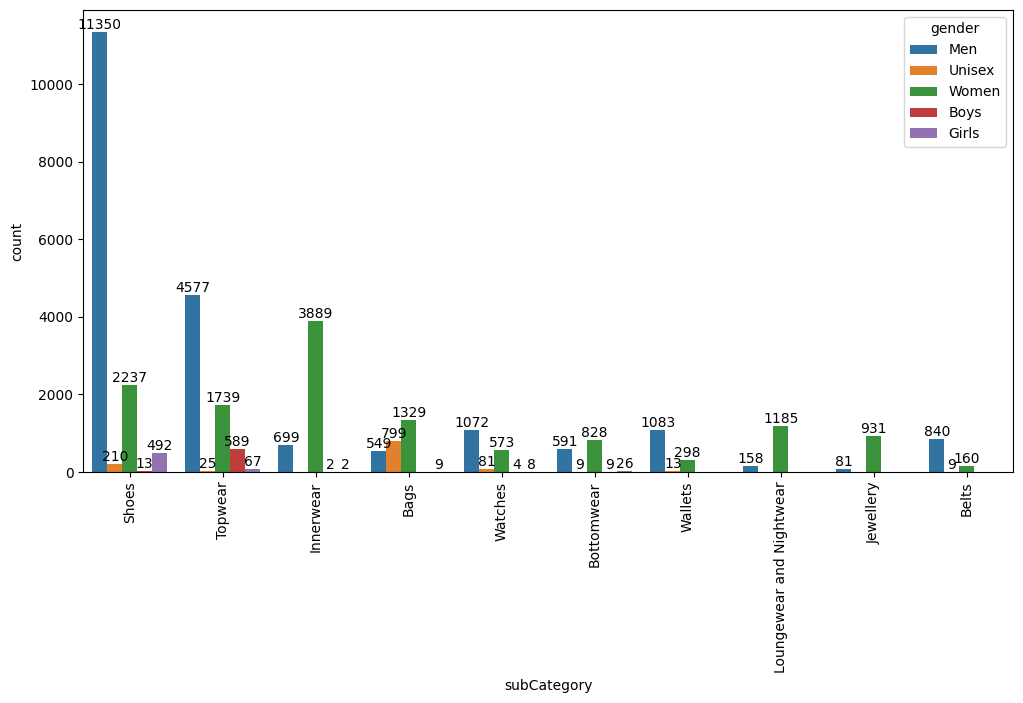

In [ ]:
plt.figure(figsize=(12,6))
df_grouped = df_balanced.groupby(['subCategory', 'gender']).size().reset_index(name='count')
ax = sns.barplot(data=df_grouped, x='subCategory', y='count', hue='gender', order=df_balanced['subCategory'].value_counts().index[:10])
for i in ax.containers:
    plt.bar_label(i)
plt.xticks(rotation=90)
plt.show()

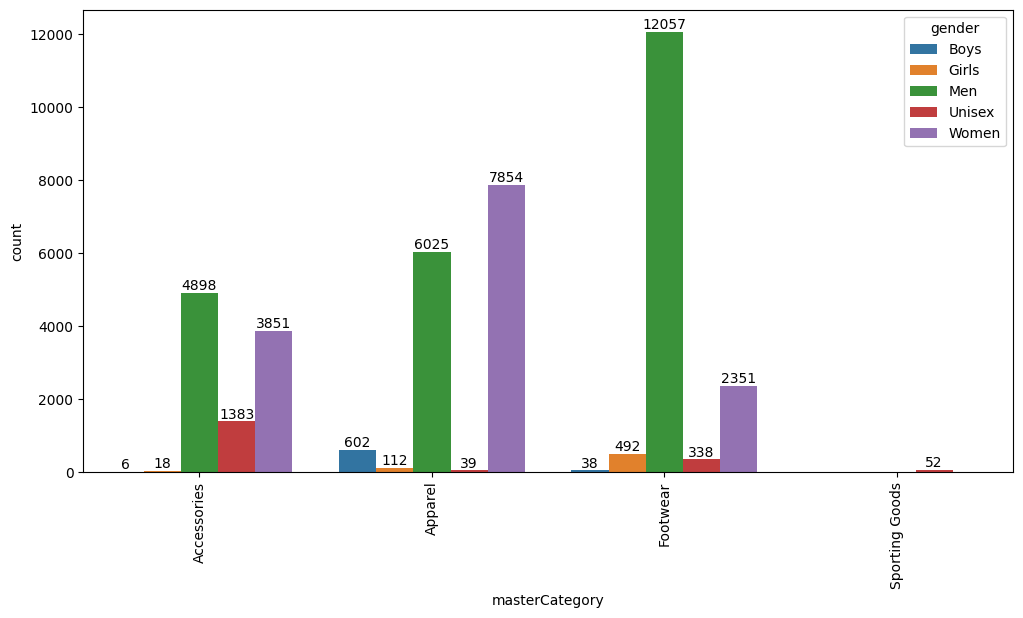

In [ ]:
# Master Category vs Gender
plt.figure(figsize=(12,6))
df_grouped = df_balanced.groupby(['masterCategory', 'gender']).size().reset_index(name='count')
ax = sns.barplot(data=df_grouped, x='masterCategory', y='count', hue='gender')
for i in ax.containers:
    plt.bar_label(i)
plt.xticks(rotation=90)
plt.show()

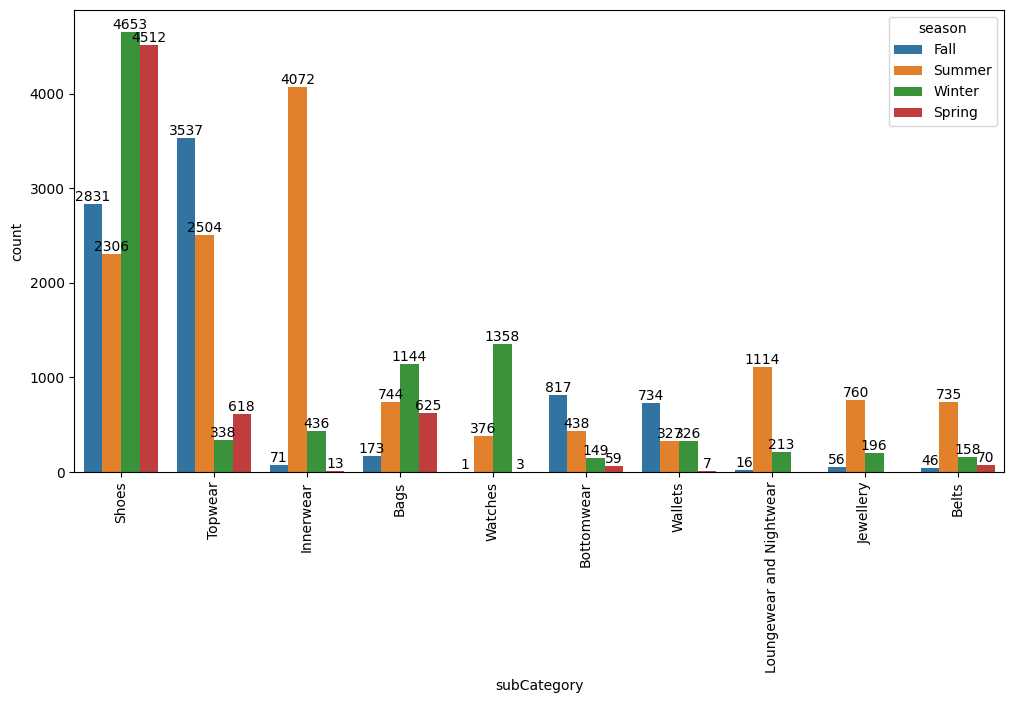

In [ ]:
# subcategory vs season
plt.figure(figsize=(12,6))
df_grouped = df_balanced.groupby(['subCategory', 'season']).size().reset_index(name='count')
ax = sns.barplot(data=df_grouped, x='subCategory', y='count', hue='season', order=df_balanced['subCategory'].value_counts().index[:10])
for i in ax.containers:
    plt.bar_label(i)
plt.xticks(rotation=90)
plt.show()

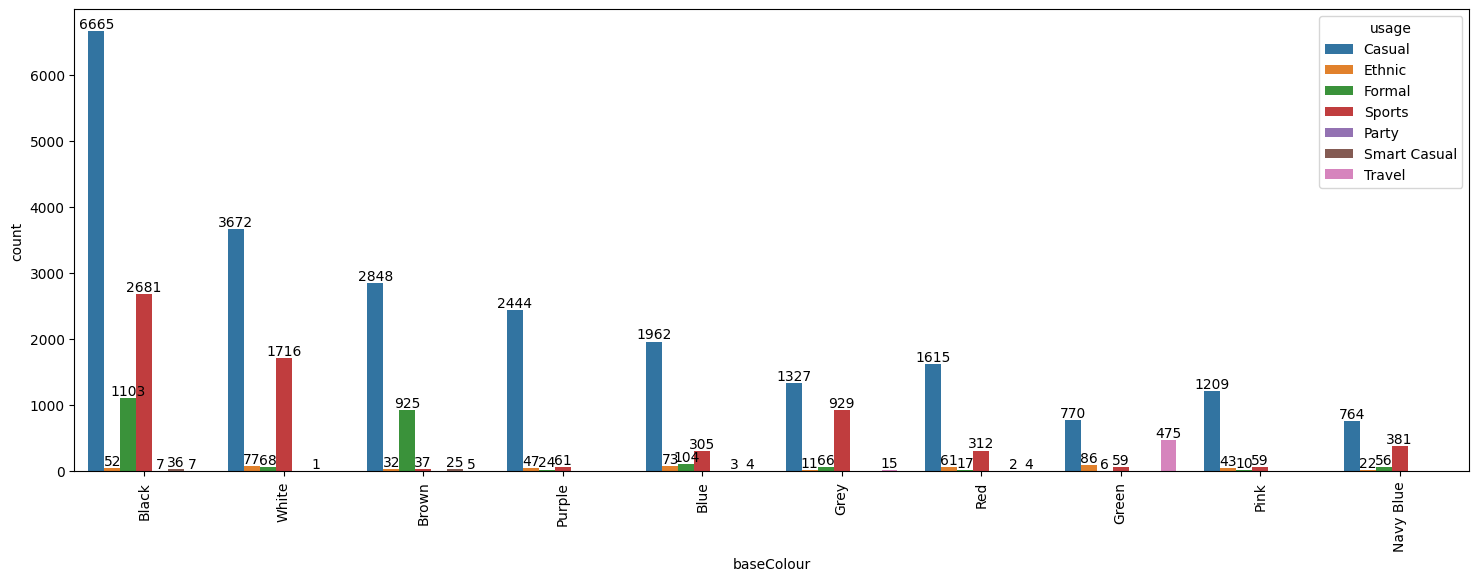

In [ ]:
# base colour vs usage
plt.figure(figsize=(18,6))
df_grouped = df_balanced.groupby(['baseColour', 'usage']).size().reset_index(name='count')
ax = sns.barplot(data=df_grouped, x='baseColour', y='count', hue='usage', order=df_balanced['baseColour'].value_counts().index[:10])
for i in ax.containers:
    plt.bar_label(i)
plt.xticks(rotation=90)
plt.show()

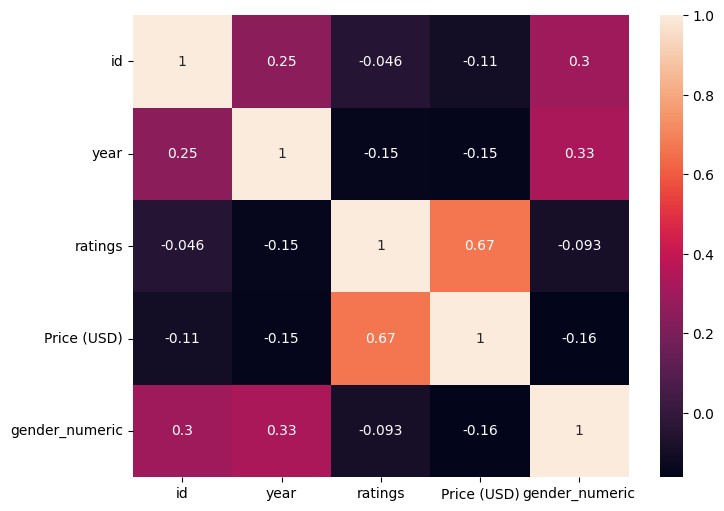

In [ ]:
gender_mapping = {'Men': 0, 'Women': 1}

# Replace the 'gender' column with numeric values
df_balanced['gender_numeric'] = df_balanced['gender'].map(gender_mapping)

plt.figure(figsize=(8,6))
# Calculate correlation on numeric columns only, including the new 'gender_numeric' column
sns.heatmap(df_balanced.select_dtypes(include=np.number).corr(), annot=True)
plt.show()

<h3>Time-based analysis/Tren analysis based on Month data</h3>

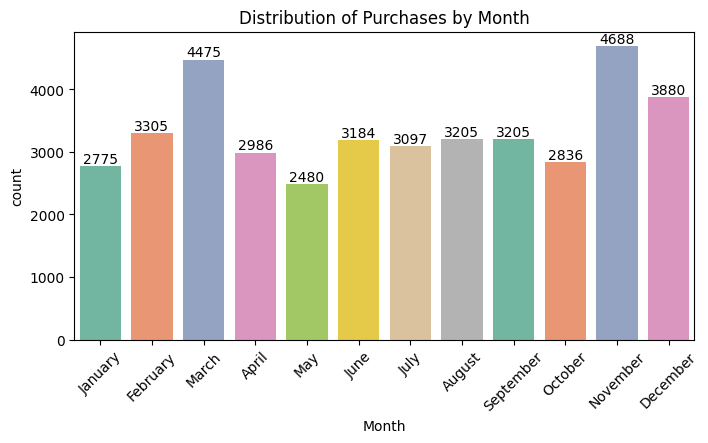

In [ ]:
# Count plot for Month
plt.figure(figsize=(8, 4))
ax = sns.countplot(data=df_balanced, x='Month', order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
                   palette="Set2")
for i in ax.containers:
    plt.bar_label(i)
plt.title('Distribution of Purchases by Month')
plt.xticks(rotation=45)
plt.show()

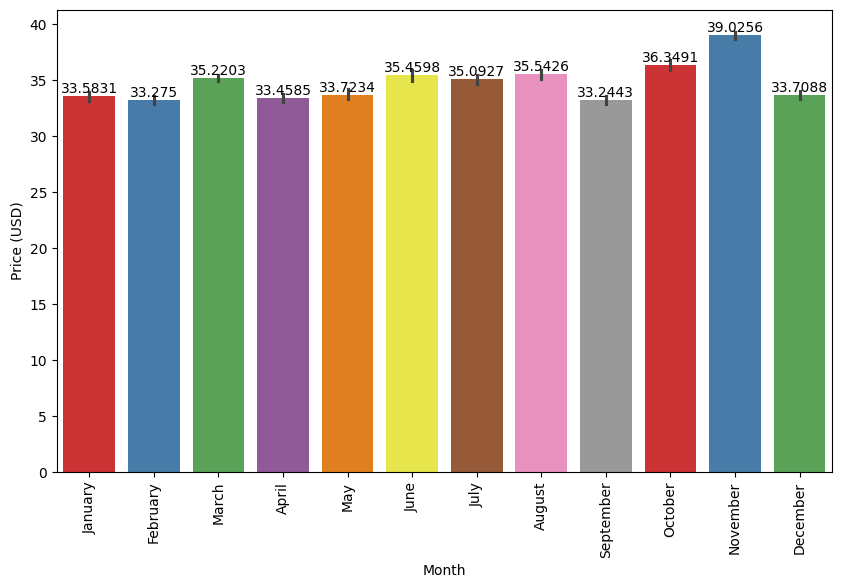

In [ ]:
# price(usd) by month
plt.figure(figsize=(10,6))
ax = sns.barplot(data=df_balanced,x="Month",y="Price (USD)",palette="Set1",
                 order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
for i in ax.containers:
    plt.bar_label(i)
plt.xticks(rotation=90)
plt.show()

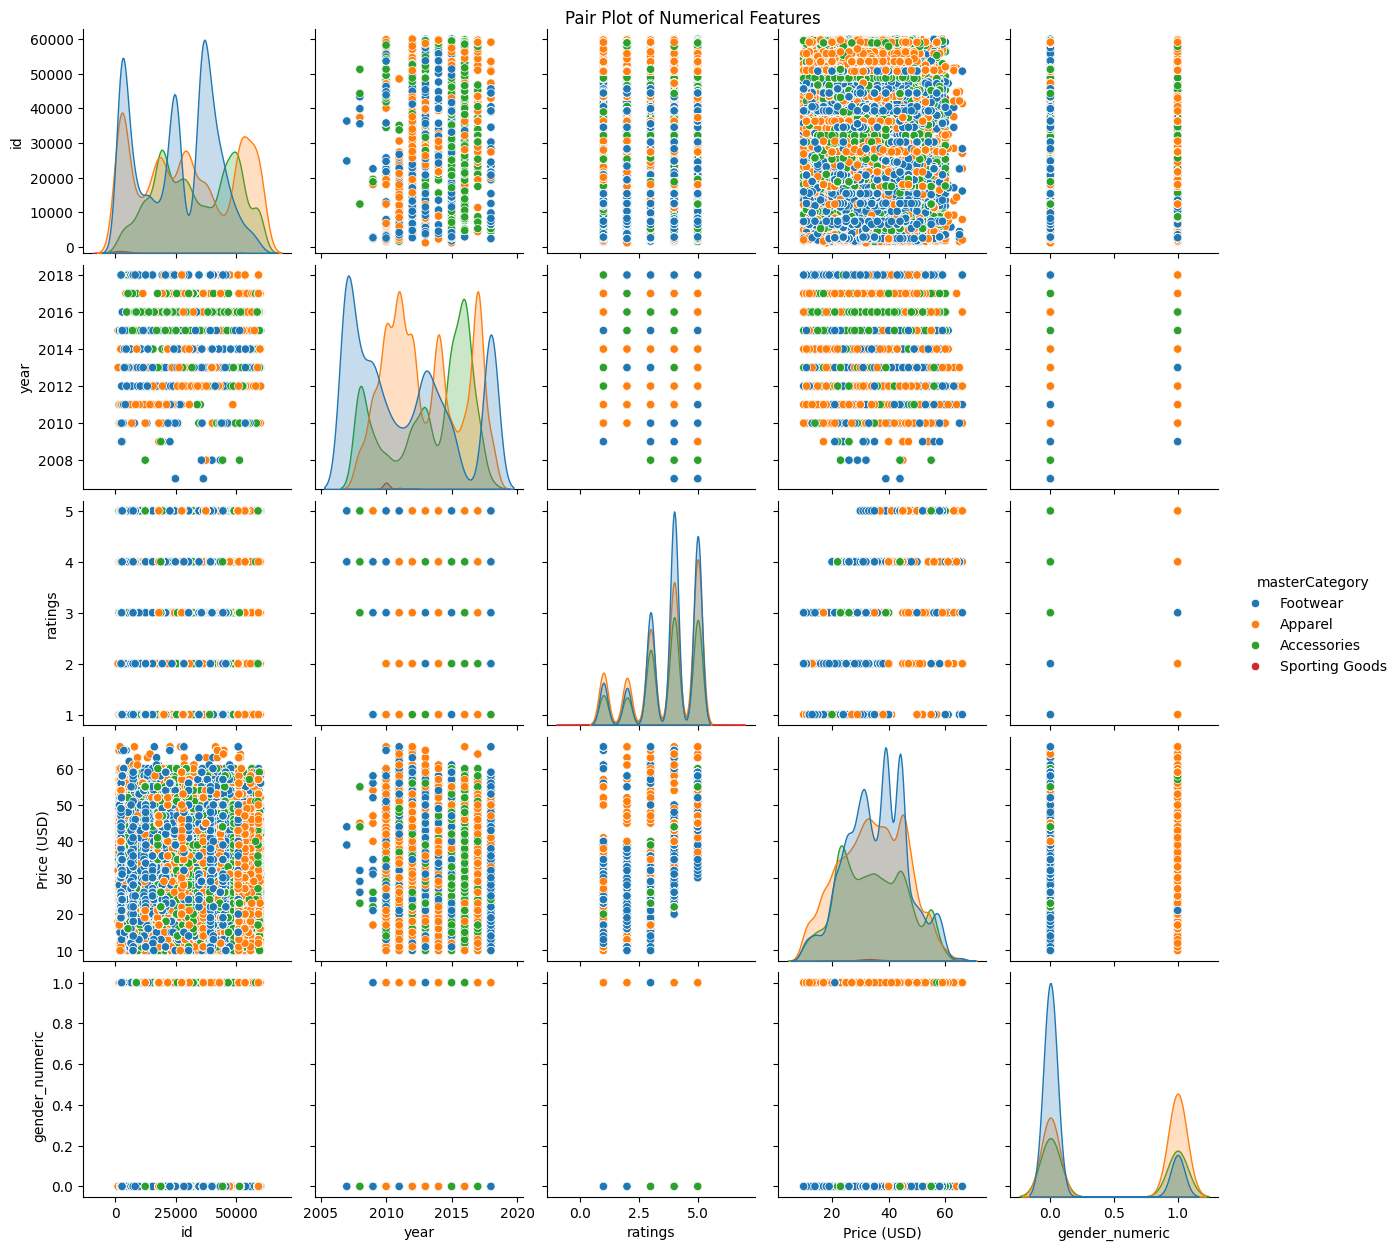

In [ ]:
# Reset the index of your DataFrame to ensure it is unique:
df_balanced = df_balanced.reset_index(drop=True)

# Then, proceed with creating the pair plot:
sns.pairplot(df_balanced, diag_kind='kde', hue='masterCategory')
plt.suptitle('Pair Plot of Numerical Features', y=1.0)
plt.show()

# Advanced EDA

<h3>clustering analysis</h3>

In [ ]:
# label encoding categorical columns
from sklearn.preprocessing import LabelEncoder,StandardScaler
le = LabelEncoder()
for i in catnames:
    df_balanced[i] = le.fit_transform(df_balanced[i])

In [ ]:
df_balanced

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,filename,link,ratings,review,Month,Price (USD),gender_numeric
0,11986,2,2,19,16,44,0,2011.0,0,Fila Men Trasform White Casual Shoes,11986.jpg,http://assets.myntassets.com/v1/images/style/p...,5,Amazing quality! Definitely recommend. for cas...,5,40,0.0
1,3709,2,1,25,94,32,2,2011.0,0,Classic Polo Men's Purple Black Stripe T-shirt,3709.jpg,http://assets.myntassets.com/v1/images/style/p...,4,"Exceeded expectations, love the fit!.",6,33,0.0
2,24628,2,2,19,28,1,0,2011.0,2,Arrow Men Black Formal Shoes,24628.jpg,http://assets.myntassets.com/v1/images/style/p...,1,"Very disappointed, won't buy again..",6,32,0.0
3,11557,4,1,25,42,44,2,2011.0,1,W Women Printed White Kurtas,11557.jpg,http://assets.myntassets.com/v1/images/style/p...,3,"It's okay, nothing special..",6,32,1.0
4,22740,4,1,25,42,2,0,2011.0,1,BIBA Women Printed Blue Kurta,22740.jpg,http://assets.myntassets.com/v1/images/style/p...,1,"Poor material, doesn't last long. Would recomm...",1,15,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40111,35531,1,2,19,16,33,3,2008.0,0,Enroute Teens Girls Red Ballet Flats,35531.jpg,http://assets.myntassets.com/v1/images/style/p...,3,"It's okay, nothing special. especially for thi...",11,29,NaN
40112,12348,2,0,2,31,12,1,2008.0,6,test dispName,12348.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"Comfortable and stylish, worth the price. but ...",6,55,0.0
40113,51263,2,0,3,6,4,2,2008.0,2,Raymond Men Black & Brown Reversible Leather Belt,51263.jpg,http://assets.myntassets.com/v1/images/style/p...,3,"It's okay, nothing special. for special occasi...",3,23,0.0
40114,51263,2,0,3,6,4,2,2008.0,2,Raymond Men Black & Brown Reversible Leather Belt,51263.jpg,http://assets.myntassets.com/v1/images/style/p...,3,"It's okay, nothing special. for special occasi...",3,23,0.0


In [ ]:
# scaling the columns
features_to_be_scaled = ['gender', 'masterCategory', 'subCategory', 'articleType',
    'baseColour', 'season', 'ratings', 'Price (USD)', 'Month', 'year','usage']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_balanced[features_to_be_scaled])

In [ ]:
df_scaled

array([[-0.68496107,  1.1026742 ,  0.31117088, ..., -0.16750428,
        -0.43452409, -0.54933312],
       [-0.68496107, -0.16509142,  1.1074116 , ...,  0.12514855,
        -0.43452409, -0.54933312],
       [-0.68496107,  1.1026742 ,  0.31117088, ...,  0.12514855,
        -0.43452409,  0.47201174],
       ...,
       [-0.68496107, -1.43285705, -1.81213769, ..., -0.75280993,
        -1.30357228,  0.47201174],
       [-0.68496107, -1.43285705, -1.81213769, ..., -0.75280993,
        -1.30357228,  0.47201174],
       [-0.68496107, -1.43285705, -1.81213769, ..., -0.75280993,
        -1.30357228,  0.47201174]])

In [ ]:
# applying pca for dimanesionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

In [ ]:
# elbow method to decide clusters for k-means clustering analysis
from sklearn.cluster import KMeans
wcss = [] # within cluster sum of squares
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(pca_result)
    wcss.append(kmeans.inertia_)

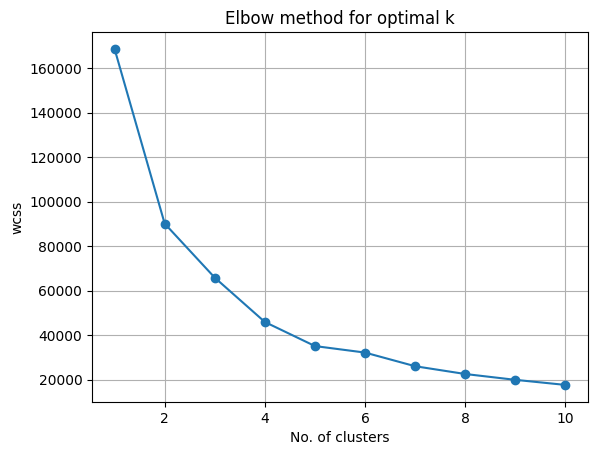

In [ ]:
plt.plot(range(1,11),wcss,marker='o')
plt.xlabel("No. of clusters")
plt.ylabel("wcss")
plt.title("Elbow method for optimal k")
plt.grid(True)
plt.show()

In [ ]:
df_pca = pd.DataFrame(pca_result,columns=['pca1','pca2'])
df_pca

,pca1,pca2
0,-1.368319,1.189771
1,-0.914707,-0.638105
2,-0.751584,-1.611106
3,0.268260,-0.556909
4,0.427383,-2.913838
...,...,...
40111,-0.355314,-0.159147
40112,-1.557690,1.837407
40113,0.835045,-0.471866
40114,0.835045,-0.471866


In [ ]:
kmeans = KMeans(n_clusters=4,random_state=42)
df_pca["cluster"] = kmeans.fit_predict(df_pca)
df_pca

,pca1,pca2,cluster
0,-1.368319,1.189771,0
1,-0.914707,-0.638105,2
2,-0.751584,-1.611106,2
3,0.268260,-0.556909,1
4,0.427383,-2.913838,1
...,...,...,...
40111,-0.355314,-0.159147,2
40112,-1.557690,1.837407,0
40113,0.835045,-0.471866,1
40114,0.835045,-0.471866,1


In [ ]:
df_balanced["cluster"] = df_pca['cluster']

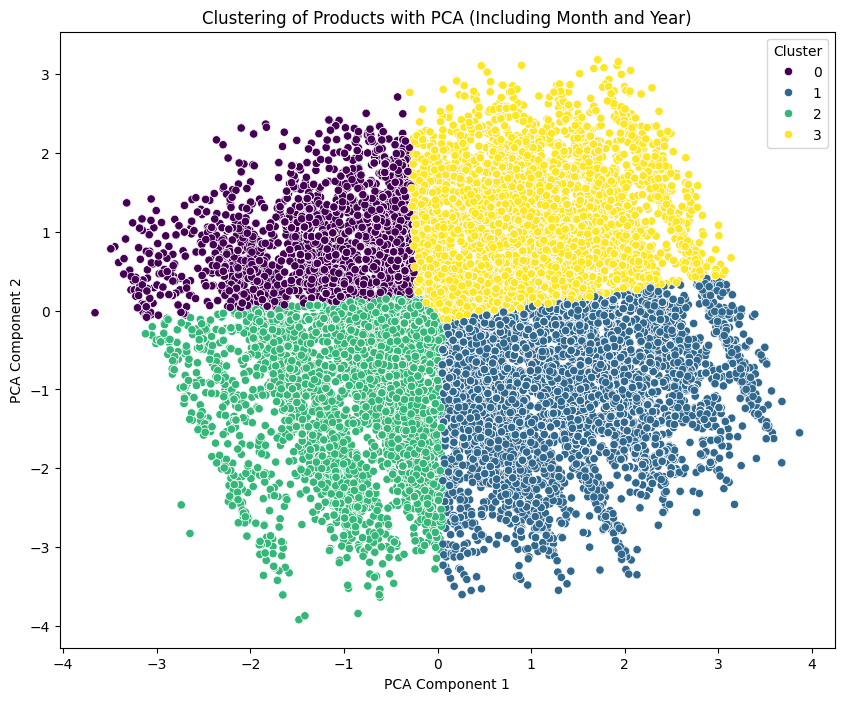

In [ ]:
# Visualize the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df_pca,
    x='pca1', y='pca2',
    hue='cluster',
    palette='viridis'
)
plt.title('Clustering of Products with PCA (Including Month and Year)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [ ]:
df_balanced.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,filename,link,ratings,review,Month,Price (USD),gender_numeric,cluster
0,11986,2,2,19,16,44,0,2011.0,0,Fila Men Trasform White Casual Shoes,11986.jpg,http://assets.myntassets.com/v1/images/style/p...,5,Amazing quality! Definitely recommend. for cas...,5,40,0.0,0
1,3709,2,1,25,94,32,2,2011.0,0,Classic Polo Men's Purple Black Stripe T-shirt,3709.jpg,http://assets.myntassets.com/v1/images/style/p...,4,"Exceeded expectations, love the fit!.",6,33,0.0,2
2,24628,2,2,19,28,1,0,2011.0,2,Arrow Men Black Formal Shoes,24628.jpg,http://assets.myntassets.com/v1/images/style/p...,1,"Very disappointed, won't buy again..",6,32,0.0,2
3,11557,4,1,25,42,44,2,2011.0,1,W Women Printed White Kurtas,11557.jpg,http://assets.myntassets.com/v1/images/style/p...,3,"It's okay, nothing special..",6,32,1.0,1
4,22740,4,1,25,42,2,0,2011.0,1,BIBA Women Printed Blue Kurta,22740.jpg,http://assets.myntassets.com/v1/images/style/p...,1,"Poor material, doesn't last long. Would recomm...",1,15,1.0,1


In [ ]:
import tensorflow as tf
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Image processing parameters
IMAGE_SIZE = (60, 80)
BATCH_SIZE = 32

In [ ]:
image_folder = '/content/drive/MyDrive/images'

In [ ]:
# Create a list of full image paths from the CSV
image_paths = [os.path.join(image_folder, image_id) for image_id in df['filename']]

In [ ]:
# Function to load and preprocess an image
def load_and_preprocess_image(path):
    img = tf.io.read_file(path)  # Read the image file
    img = tf.image.decode_jpeg(img, channels=3)  # Decode the JPEG image
    img = tf.image.resize(img, IMAGE_SIZE)  # Resize the image to target size
    img = img / 255.0  # Normalize pixel values to [0, 1]
    return img

In [ ]:
# Create a TensorFlow dataset from image paths
dataset = tf.data.Dataset.from_tensor_slices(image_paths)  # Create dataset from image paths
dataset = dataset.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)  # Load and preprocess images
dataset = dataset.batch(BATCH_SIZE)  # Batch the dataset
dataset = dataset.prefetch(tf.data.AUTOTUNE)  # Optimize loading performance

In [ ]:
for images_batch in dataset.take(1):
    print(f"Batch shape: {images_batch.shape}")

Batch shape: (32, 60, 80, 3)


In [ ]:
# Number of images
num_images = len(image_paths)

# Number of batches
num_batches = num_images // BATCH_SIZE + int(num_images % BATCH_SIZE != 0)  # Add 1 if there's a remainder
print(f"Total number of batches: {num_batches}")

Total number of batches: 1254


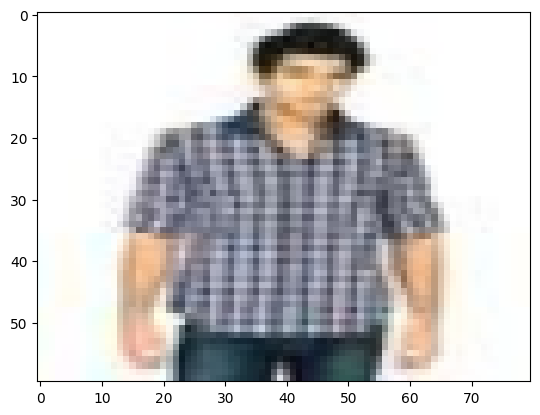

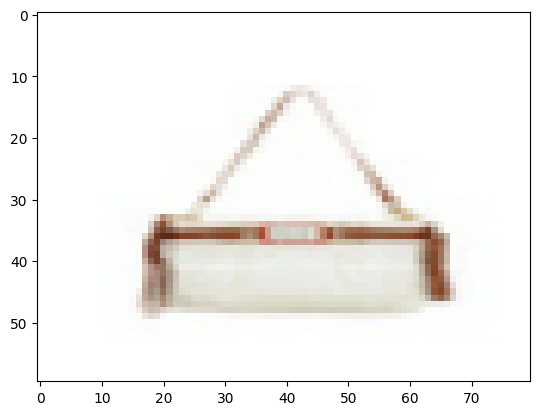

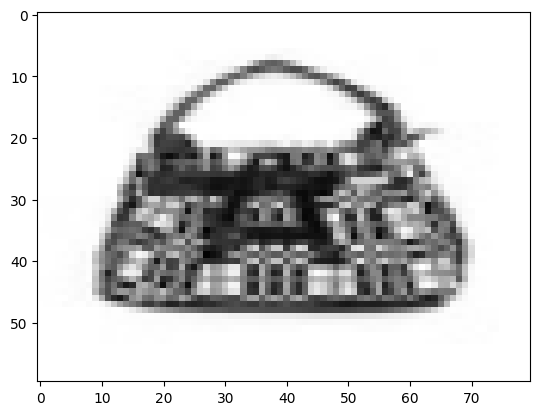

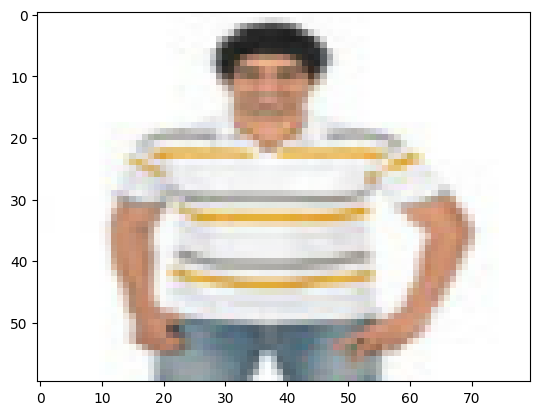

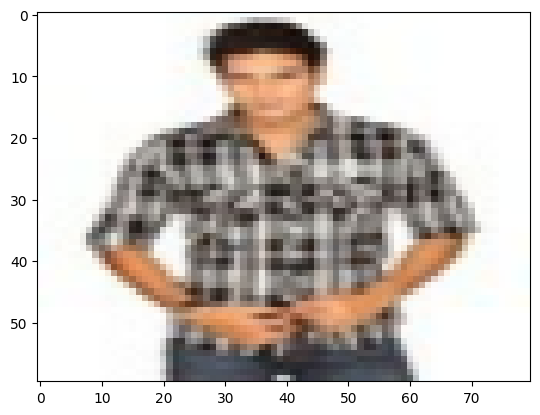

In [ ]:
for images_batch in dataset.take(5):
    plt.imshow(images_batch[0])
    plt.show()